In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,r2_score
from sklearn import metrics
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import Binarizer
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.tree import export_graphviz
import graphviz
import os

In [2]:
import pandas as pd 
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.cm as cm

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import ipywidgets as widgets
from IPython.display import display
from IPython.display import set_matplotlib_formats

In [3]:
# 그래프 시각화 옵션 
%matplotlib inline

mpl.rc('font', family = "Malgun Gothic") 

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


mpl.rc('axes', unicode_minus = False)

pd.options.display.max_columns =100

In [4]:
df1 = pd.read_csv('D:/data_경진대회/data_clean/data/누적주문횟수 4회 이상인 고객들.csv',encoding='euc-kr', engine='python')
print(df1.shape)
df1.head(3)

(16279, 50)


,주문번호,주문자ID,주문경로(PC/모바일),결제수단,총 결제금액,주문상품명,상품번호,주문횟수,상품명(패커스(PACKUS)),수량,분류,세부분류,사이즈,색상,개수,공급사,자체상품코드,주문일시,결제일시(입금확인일),발주일,배송대기일,배송시작일,배송완료일,세금구분,공급원가,상품 매입가,판매가,상품구매금액,상품별 추가할인 상세,옵션+판매가,쿠폰 할인금액,주문자 가입일,특별관리회원,회원추가항목_가입경로,회원추가항목_업종,주문 시 회원등급,주문자 주소,수령인 주소,위도,경도,주문-배송완료,발주일-배송시작일,배송시작-배송완료,회원가입연도,회원가입월,회원가입일,가장최근주문,19년이후 누적주문횟수,가입기간(일수),누적주문횟수
0,20170425-0000034,kim0019,모바일,"쿠폰,무통장입금",85350,사각 죽용기 소 550ml 500개 1set(2박스),88,477.0,사각 죽용기 소 550ml 500개 1set(2박스),1,1.0,죽용기,550ml,NaN,1000.0,패커스,P00000DJ,2017-04-25 13:23:46.000,2017-04-25 14:25:46.000,2017-04-25 14:25:46.000,2017-04-25 18:59:06.335,2017-04-25 18:59:45.000,2017-04-27 14:19:32.000,과세상품,71500.0,72500,90350,90350.0,NaN,90350.0,5000.0,2017-04-25 00:00:00.000,NaN,NaN,NaN,일반,대구광역시 동구 팔공로28길 8-11 (불로동),대구광역시 동구 팔공로28길 8-11 (불로동),35.910542,128.642443,2 days 00:55:46.000000000,0 days 04:33:59.000000000,1 days 19:19:47.000000000,2017,04,04,2018-12-25 17:10:48.000,NaN,1004,8.0
1,20170602-0000086,kim0019,모바일,"쿠폰,무통장입금",87350,사각 죽용기 소 550ml 500개 1set(2박스),88,477.0,사각 죽용기 소 550ml 500개 1set(2박스),1,1.0,죽용기,550ml,NaN,1000.0,패커스,P00000DJ,2017-06-02 15:11:09.000,2017-06-03 12:08:23.000,2017-06-03 12:08:23.000,NaN,2017-06-05 16:38:04.000,2017-06-11 05:37:38.000,과세상품,71500.0,72500,90350,90350.0,NaN,90350.0,3000.0,2017-04-25 00:00:00.000,NaN,NaN,NaN,사업자,대구광역시 동구 팔공로28길 8-11 (불로동),대구광역시 동구 팔공로28길 8-11 (불로동),35.910542,128.642443,8 days 14:26:29.000000000,2 days 04:29:41.000000000,5 days 12:59:34.000000000,2017,04,04,2018-12-25 17:10:48.000,NaN,1004,8.0
2,20170709-0000014,kim0019,모바일,"쿠폰,무통장입금",88250,사각 죽용기 소 550ml 500개 1set(2박스),88,477.0,사각 죽용기 소 550ml 500개 1set(2박스),1,1.0,죽용기,550ml,NaN,1000.0,패커스,P00000DJ,2017-07-09 00:30:32.000,2017-07-10 08:32:24.000,2017-07-10 08:32:24.000,2017-07-11 19:15:52.750,2017-07-13 08:28:05.000,2017-07-19 05:34:46.000,과세상품,71500.0,72500,90250,90250.0,NaN,90250.0,2000.0,2017-04-25 00:00:00.000,NaN,NaN,NaN,사업자,대구광역시 동구 팔공로28길 8-11 (불로동),대구광역시 동구 팔공로28길 8-11 (불로동),35.910542,128.642443,10 days 05:04:14.000000000,2 days 23:55:41.000000000,5 days 21:06:41.000000000,2017,04,04,2018-12-25 17:10:48.000,NaN,1004,8.0


In [5]:
df1 = df1.drop_duplicates(['주문자ID'], keep='first')

In [6]:
df1.shape

(1373, 50)

In [7]:
df1['주문경로'] = df1['주문경로(PC/모바일)']

In [8]:
df1['datetime'] = pd.to_datetime(df1['가장최근주문'])
df1[['datetime', '가장최근주문']].head()

,datetime,가장최근주문
0,2018-12-25 17:10:48,2018-12-25 17:10:48.000
6,2019-05-03 04:09:24,2019-05-03 04:09:24.000
14,2019-03-24 23:37:51,2019-03-24 23:37:51.000
18,2017-06-19 19:56:30,2017-06-19 19:56:30.000
25,2017-10-06 16:36:38,2017-10-06 16:36:38.000


In [9]:
df1['가장최근주문_year'] = df1['datetime'].dt.year
df1['가장최근주문_month'] = df1['datetime'].dt.month
df1['가장최근주문_day'] = df1['datetime'].dt.day
df1[['datetime','가장최근주문_year','가장최근주문_month','가장최근주문_day']].head()

,datetime,가장최근주문_year,가장최근주문_month,가장최근주문_day
0,2018-12-25 17:10:48,2018,12,25
6,2019-05-03 04:09:24,2019,5,3
14,2019-03-24 23:37:51,2019,3,24
18,2017-06-19 19:56:30,2017,6,19
25,2017-10-06 16:36:38,2017,10,6


In [10]:
data = df1[['주문경로', '결제수단', '총 결제금액', '주문횟수', '세부분류', '색상', '공급사',
            '주문 시 회원등급', '회원가입연도', '회원가입월', '회원가입일', '19년이후 누적주문횟수',
            '가입기간(일수)', '누적주문횟수','가장최근주문_year', '가장최근주문_day', '가장최근주문_day','회원추가항목_가입경로', '회원추가항목_업종']]

In [11]:
data.columns

Index(['주문경로', '결제수단', '총 결제금액', '주문횟수', '세부분류', '색상', '공급사', '주문 시 회원등급',
       '회원가입연도', '회원가입월', '회원가입일', '19년이후 누적주문횟수', '가입기간(일수)', '누적주문횟수',
       '가장최근주문_year', '가장최근주문_day', '가장최근주문_day', '회원추가항목_가입경로', '회원추가항목_업종'],
      dtype='object')

In [12]:
data.shape

(1373, 19)

In [13]:
data['19년이후 누적주문횟수'] = data['19년이후 누적주문횟수'].fillna(0)

C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
data['총 결제금액'] = data['총 결제금액'].replace('NaT', '0').astype(float)
data['주문횟수'] = data['주문횟수'].replace('NaT', '0').astype(float)
data['회원가입연도'] = data['회원가입연도'].replace('NaT', '0').astype(float)
data['회원가입월'] = data['회원가입월'].replace('NaT', '0').astype(float)
data['회원가입일'] = data['회원가입일'].replace('NaT', '0').astype(float)
data['19년이후 누적주문횟수'] = data['19년이후 누적주문횟수'].replace('NaT', '0').astype(float)
data['가입기간(일수)'] = data['가입기간(일수)'].replace('NaT', '0').astype(float)
data['누적주문횟수'] = data['누적주문횟수'].replace('NaT', '0').astype(float)
data['가장최근주문_year'] = data['가장최근주문_year'].replace('NaT', '0').astype(float)
data['가장최근주문_day'] = data['가장최근주문_day'].replace('NaT', '0').astype(float)
data['주문경로'] = data['주문경로'].replace('NaT', '0')
data['결제수단'] = data['결제수단'].replace('NaT', '0')
data['세부분류'] = data['세부분류'].replace('NaT', '0')
data['색상'] = data['색상'].replace('NaT', '0')
data['공급사'] = data['공급사'].replace('NaT', '0')
data['주문 시 회원등급'] = data['주문 시 회원등급'].replace('NaT', '0')
data['회원추가항목_가입경로'] = data['회원추가항목_가입경로'].replace('NaT', '0')
data['회원추가항목_업종'] = data['회원추가항목_업종'].replace('NaT', '0')

C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [27]:
data.head()

,주문경로,결제수단,총 결제금액,주문횟수,세부분류,색상,공급사,주문 시 회원등급,회원가입연도,회원가입월,회원가입일,19년이후 누적주문횟수,가입기간(일수),누적주문횟수,가장최근주문_year,가장최근주문_day,가장최근주문_day,회원추가항목_가입경로,회원추가항목_업종
0,모바일,"쿠폰,무통장입금",85350.0,477.0,죽용기,NaN,패커스,일반,2017.0,4.0,4.0,0.0,1004.0,8.0,2018.0,25.0,25.0,NaN,NaN
6,PC,"쿠폰,카드",169500.0,477.0,다용도컵,백색,패커스,사업자,2017.0,3.0,3.0,51.0,1004.0,22.0,2019.0,3.0,3.0,NaN,NaN
14,PC,카드,82750.0,477.0,죽용기,NaN,패커스,일반,2017.0,3.0,3.0,8.0,1004.0,7.0,2019.0,24.0,24.0,NaN,NaN
18,PC,"쿠폰,카드",104000.0,141.0,다용도컵,백색,패커스,일반,2017.0,3.0,3.0,0.0,1004.0,7.0,2017.0,19.0,19.0,NaN,NaN
25,모바일,"쿠폰,무통장입금",48100.0,477.0,다용도컵,백색,패커스,일반,2017.0,3.0,3.0,0.0,1004.0,13.0,2017.0,6.0,6.0,NaN,NaN


In [28]:
data.describe()

,총 결제금액,주문횟수,회원가입연도,회원가입월,회원가입일,19년이후 누적주문횟수,가입기간(일수),누적주문횟수,가장최근주문_year,가장최근주문_day,가장최근주문_day
count,1.373000e+03,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.0,1373.000000,1373.000000,1373.000000,1373.000000
mean,1.590681e+05,457.658412,2016.648944,5.914057,5.914057,22.974508,1004.0,11.856519,2018.845594,17.783685,17.783685
std,1.506047e+05,463.629282,54.466635,3.467662,3.467662,29.199726,0.0,12.101151,0.396105,9.149183,9.149183
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,1004.0,4.000000,2017.000000,1.000000,1.000000
25%,6.491000e+04,133.000000,2018.000000,3.000000,3.000000,8.000000,1004.0,5.000000,2019.000000,10.000000,10.000000
50%,1.084600e+05,314.000000,2018.000000,5.000000,5.000000,14.000000,1004.0,8.000000,2019.000000,19.000000,19.000000
75%,1.979700e+05,518.000000,2018.000000,9.000000,9.000000,27.000000,1004.0,14.000000,2019.000000,26.000000,26.000000
max,1.855260e+06,1706.000000,2019.000000,12.000000,12.000000,295.000000,1004.0,155.000000,2019.000000,31.000000,31.000000


In [32]:
cond1 = data['총 결제금액']>= 90000
data.loc[cond1,'VIP'] = 1
data.loc[~cond1,'VIP'] = 0
data['VIP'].value_counts()

1.0    824
0.0    549
Name: VIP, dtype: int64

# Train Test Set 생성

In [33]:
data.head(1)

,주문경로,결제수단,총 결제금액,주문횟수,세부분류,색상,공급사,주문 시 회원등급,회원가입연도,회원가입월,회원가입일,19년이후 누적주문횟수,가입기간(일수),누적주문횟수,가장최근주문_year,가장최근주문_day,가장최근주문_day,회원추가항목_가입경로,회원추가항목_업종,VIP
0,모바일,"쿠폰,무통장입금",85350.0,477.0,죽용기,NaN,패커스,일반,2017.0,4.0,4.0,0.0,1004.0,8.0,2018.0,25.0,25.0,NaN,NaN,0.0


In [34]:
data.columns

Index(['주문경로', '결제수단', '총 결제금액', '주문횟수', '세부분류', '색상', '공급사', '주문 시 회원등급',
       '회원가입연도', '회원가입월', '회원가입일', '19년이후 누적주문횟수', '가입기간(일수)', '누적주문횟수',
       '가장최근주문_year', '가장최근주문_day', '가장최근주문_day', '회원추가항목_가입경로', '회원추가항목_업종',
       'VIP'],
      dtype='object')

In [35]:
data1 = data[['주문경로', '결제수단', '총 결제금액', '주문횟수', '세부분류', '색상', '공급사',
            '주문 시 회원등급', '회원가입연도', '회원가입월', '회원가입일', '19년이후 누적주문횟수',
            '가입기간(일수)', '누적주문횟수','가장최근주문_year', '가장최근주문_day', '가장최근주문_day','회원추가항목_가입경로', '회원추가항목_업종', 'VIP']]

In [36]:
data2 = pd.get_dummies(data1)

In [37]:
data2.columns

Index(['총 결제금액', '주문횟수', '회원가입연도', '회원가입월', '회원가입일', '19년이후 누적주문횟수',
       '가입기간(일수)', '누적주문횟수', '가장최근주문_year', '가장최근주문_day',
       ...
       '회원추가항목_가입경로_지인 추천을 통해', '회원추가항목_업종_기타', '회원추가항목_업종_도시락',
       '회원추가항목_업종_족발', '회원추가항목_업종_중식', '회원추가항목_업종_한식', '회원추가항목_업종_한식,기타',
       '회원추가항목_업종_한식,분식,도시락', '회원추가항목_업종_한식,일식', '회원추가항목_업종_한식,족발'],
      dtype='object', length=105)

In [38]:
data['주문 시 회원등급'].value_counts()

일반         852
전화주문 고객    308
사업자        213
Name: 주문 시 회원등급, dtype: int64

In [39]:
data2 = pd.get_dummies(data)

In [40]:
data2.columns

Index(['총 결제금액', '주문횟수', '회원가입연도', '회원가입월', '회원가입일', '19년이후 누적주문횟수',
       '가입기간(일수)', '누적주문횟수', '가장최근주문_year', '가장최근주문_day',
       ...
       '회원추가항목_가입경로_지인 추천을 통해', '회원추가항목_업종_기타', '회원추가항목_업종_도시락',
       '회원추가항목_업종_족발', '회원추가항목_업종_중식', '회원추가항목_업종_한식', '회원추가항목_업종_한식,기타',
       '회원추가항목_업종_한식,분식,도시락', '회원추가항목_업종_한식,일식', '회원추가항목_업종_한식,족발'],
      dtype='object', length=103)

In [41]:
Y = data2[['VIP']]

In [42]:
salessum = data2[['총 결제금액']]

In [43]:
del data2['VIP']

In [44]:
del data2['총 결제금액']

In [45]:
list = data2.columns
list

Index(['주문횟수', '회원가입연도', '회원가입월', '회원가입일', '19년이후 누적주문횟수', '가입기간(일수)',
       '누적주문횟수', '가장최근주문_year', '가장최근주문_day', '가장최근주문_day',
       ...
       '회원추가항목_가입경로_지인 추천을 통해', '회원추가항목_업종_기타', '회원추가항목_업종_도시락',
       '회원추가항목_업종_족발', '회원추가항목_업종_중식', '회원추가항목_업종_한식', '회원추가항목_업종_한식,기타',
       '회원추가항목_업종_한식,분식,도시락', '회원추가항목_업종_한식,일식', '회원추가항목_업종_한식,족발'],
      dtype='object', length=101)

In [46]:
data2['VIP'] = Y
data2['총 결제금액'] = salessum

In [47]:
X = data2[list]
Y = data2[['VIP']]
print(X.shape)
print(Y.shape)

(1373, 103)
(1373, 1)


In [48]:
data2.head(2)

,주문횟수,회원가입연도,회원가입월,회원가입일,19년이후 누적주문횟수,가입기간(일수),누적주문횟수,가장최근주문_year,가장최근주문_day,가장최근주문_day,주문경로_PC,주문경로_모바일,결제수단_가상계좌,결제수단_무통장입금,"결제수단_무통장입금,휴대폰",결제수단_실시간계좌이체,결제수단_에스크로(실시간계좌이체),"결제수단_예치금,무통장입금","결제수단_적립금,무통장입금","결제수단_적립금,카드","결제수단_적립금,페이나우(카드)",결제수단_카드,"결제수단_카드,무통장입금",결제수단_카카오페이(카드),"결제수단_쿠폰,무통장입금","결제수단_쿠폰,카드","결제수단_쿠폰,카카오페이(카드)","결제수단_쿠폰,휴대폰",결제수단_페이나우(카드),결제수단_휴대폰,세부분류_감자탕용기,세부분류_고강도미니탕용기,세부분류_고무장갑,세부분류_냄비뚜껑,세부분류_냉면용기,세부분류_다용도컵,세부분류_단무지,세부분류_도시락용기,세부분류_도시락용기(돈까스),세부분류_랩칼,세부분류_미니탕용기,세부분류_반찬용기,세부분류_비닐봉투(맛난거),세부분류_비닐봉투(무지),세부분류_비닐봉투(배달중),세부분류_사각찬용기,세부분류_샐러드,세부분류_수세미,세부분류_실링기계,세부분류_실링용기,...,세부분류_우동용기,세부분류_원형용기,세부분류_원형접시,세부분류_위생랩,세부분류_위생롤백,세부분류_위생장갑,세부분류_일회용 숟가락,세부분류_일회용 젓가락,세부분류_일회용 포크,세부분류_죽용기,세부분류_중식소스용기,세부분류_중화면용기,세부분류_중화면용기 뚜껑,세부분류_지퍼백,세부분류_짬짜면,세부분류_찜용기(사각),세부분류_찜용기(원),세부분류_찜용기(타원),세부분류_찬용기,세부분류_타원접시,세부분류_탕용기,세부분류_행주,색상_노랑,색상_반투명,색상_백색,색상_블랙,색상_블랭,색상_투명,색상_투톤,공급사_다이찌롱스토어,공급사_패커스,주문 시 회원등급_사업자,주문 시 회원등급_일반,주문 시 회원등급_전화주문 고객,회원추가항목_가입경로_기타,회원추가항목_가입경로_인터넷 검색,회원추가항목_가입경로_잡지를 통해,회원추가항목_가입경로_전단지 인쇄물을 통해,회원추가항목_가입경로_지인 추천을 통해,회원추가항목_업종_기타,회원추가항목_업종_도시락,회원추가항목_업종_족발,회원추가항목_업종_중식,회원추가항목_업종_한식,"회원추가항목_업종_한식,기타","회원추가항목_업종_한식,분식,도시락","회원추가항목_업종_한식,일식","회원추가항목_업종_한식,족발",VIP,총 결제금액
0,477.0,2017.0,4.0,4.0,0.0,1004.0,8.0,2018.0,25.0,25.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,85350.0
6,477.0,2017.0,3.0,3.0,51.0,1004.0,22.0,2019.0,3.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,169500.0


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1234)

print("Train X : ",X_train.shape)
print("Test X : ",X_test.shape)
print("Train Y : ",Y_train.shape)
print("Test Y : ",Y_test.shape)

Train X :  (961, 103)
Test X :  (412, 103)
Train Y :  (961, 1)
Test Y :  (412, 1)


# Model Fitting

In [50]:
model_DT = DecisionTreeClassifier()
model_RF = RandomForestClassifier()
model_GB = GradientBoostingClassifier()

In [51]:
model_DT.fit(X_train,Y_train)
Y_pred = model_DT.predict(X_train)
Y_pred_test = model_DT.predict(X_test)

print("=========Model Analyze Result========")
print("훈련 세트 정확도:",model_DT.score(X_train, Y_train).round(2))
print("테스트 세트 정확도:",model_DT.score(X_test, Y_test).round(2))

=========Model Analyze Result========
훈련 세트 정확도: 1.0
테스트 세트 정확도: 0.57


In [52]:
model_RF.fit(X_train,Y_train)
Y_pred = model_RF.predict(X_train)
Y_pred_test = model_RF.predict(X_test)

print("=========Model Analyze Result========")
print("훈련 세트 정확도:",model_RF.score(X_train, Y_train).round(2))
print("테스트 세트 정확도:",model_RF.score(X_test, Y_test).round(2))

C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


=========Model Analyze Result========
훈련 세트 정확도: 0.98
테스트 세트 정확도: 0.65


In [53]:
model_GB.fit(X_train,Y_train)
Y_pred = model_GB.predict(X_train)
Y_pred_test = model_GB.predict(X_test)

print("=========Model Analyze Result========")
print("훈련 세트 정확도:",model_GB.score(X_train, Y_train).round(2))
print("테스트 세트 정확도:",model_GB.score(X_test, Y_test).round(2))

C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=========Model Analyze Result========
훈련 세트 정확도: 0.79
테스트 세트 정확도: 0.67


# Grid Search CV 

In [54]:
def Gride_Search_Model(model):
    parameters = {'max_depth':[3,4,5],'min_samples_split':[3,4]}

    grid_Tree = GridSearchCV(model,param_grid=parameters,cv=3,refit=True)

    grid_Tree.fit(X_train,Y_train)
    score_df = pd.DataFrame(grid_Tree.cv_results_)
    score_df.columns
    print("Best GridSearchCV Parameter : ",grid_Tree.best_params_)
    print("Best GridSearchCV Accuracy : ", (grid_Tree.best_score_).round(3))
    
    estimator = grid_Tree.best_estimator_
    pred = estimator.predict(X_test)

    print('Test Set Accuracy : ', (accuracy_score(Y_test,pred).round(3)))

In [55]:
model_DT_Grid = Gride_Search_Model(model_DT)
model_DT_Grid

Best GridSearchCV Parameter :  {'max_depth': 3, 'min_samples_split': 3}
Best GridSearchCV Accuracy :  0.647
Test Set Accuracy :  0.643


C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\skle

In [56]:
Gride_Search_Model(model_RF)

C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vec

Best GridSearchCV Parameter :  {'max_depth': 3, 'min_samples_split': 4}
Best GridSearchCV Accuracy :  0.63
Test Set Accuracy :  0.621


In [57]:
Gride_Search_Model(model_GB)

C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Best GridSearchCV Parameter :  {'max_depth': 5, 'min_samples_split': 4}
Best GridSearchCV Accuracy :  0.647
Test Set Accuracy :  0.692


C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\skle

**Tree 확인**

In [58]:
model = DecisionTreeClassifier(max_depth=5,min_samples_split=3)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_train)
Y_pred_test = model.predict(X_test)

accuracy_score(Y_test,Y_pred_test).round(3)

0.636

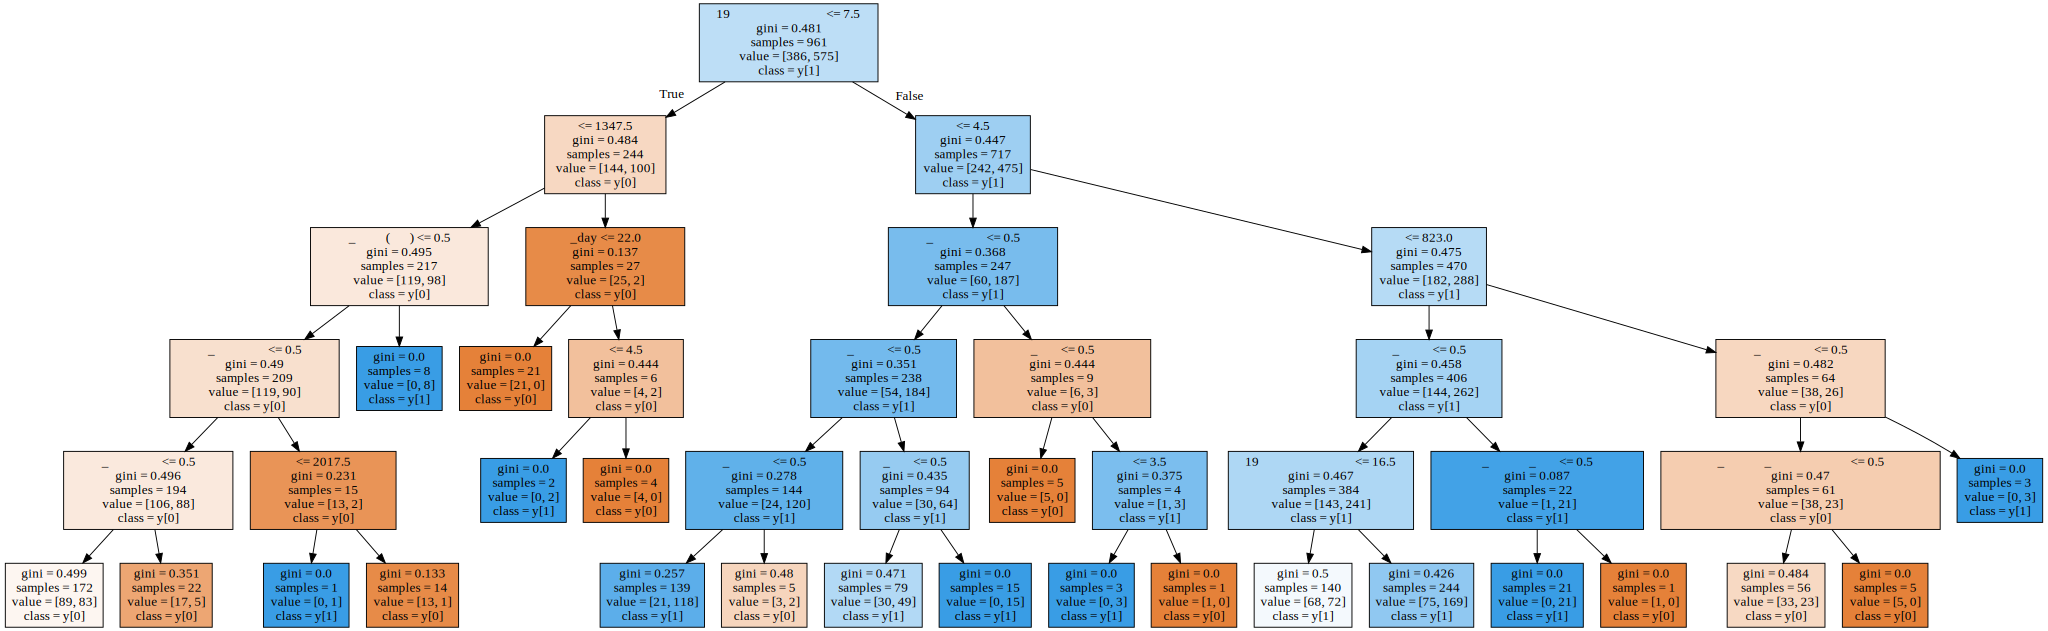

In [59]:
export_graphviz(model,out_file='tree1.dot',
                feature_names=X.columns,impurity = True, filled = True,class_names=True)

os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin/"

with open("tree1.dot",encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

**결정 경계 시각화**

In [60]:
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

In [61]:
y_label = Y_train.values[:,0]

In [76]:
x_label = X_train[['회원가입월','주문횟수']]
x_label = x_label.values

In [77]:
X_train.head(1)

,주문횟수,회원가입연도,회원가입월,회원가입일,19년이후 누적주문횟수,가입기간(일수),누적주문횟수,가장최근주문_year,가장최근주문_day,가장최근주문_day,가장최근주문_day,가장최근주문_day,주문경로_PC,주문경로_모바일,결제수단_가상계좌,결제수단_무통장입금,"결제수단_무통장입금,휴대폰",결제수단_실시간계좌이체,결제수단_에스크로(실시간계좌이체),"결제수단_예치금,무통장입금","결제수단_적립금,무통장입금","결제수단_적립금,카드","결제수단_적립금,페이나우(카드)",결제수단_카드,"결제수단_카드,무통장입금",결제수단_카카오페이(카드),"결제수단_쿠폰,무통장입금","결제수단_쿠폰,카드","결제수단_쿠폰,카카오페이(카드)","결제수단_쿠폰,휴대폰",결제수단_페이나우(카드),결제수단_휴대폰,세부분류_감자탕용기,세부분류_고강도미니탕용기,세부분류_고무장갑,세부분류_냄비뚜껑,세부분류_냉면용기,세부분류_다용도컵,세부분류_단무지,세부분류_도시락용기,세부분류_도시락용기(돈까스),세부분류_랩칼,세부분류_미니탕용기,세부분류_반찬용기,세부분류_비닐봉투(맛난거),세부분류_비닐봉투(무지),세부분류_비닐봉투(배달중),세부분류_사각찬용기,세부분류_샐러드,세부분류_수세미,...,세부분류_아이스컵,세부분류_아이스컵 뚜껑,세부분류_우동용기,세부분류_원형용기,세부분류_원형접시,세부분류_위생랩,세부분류_위생롤백,세부분류_위생장갑,세부분류_일회용 숟가락,세부분류_일회용 젓가락,세부분류_일회용 포크,세부분류_죽용기,세부분류_중식소스용기,세부분류_중화면용기,세부분류_중화면용기 뚜껑,세부분류_지퍼백,세부분류_짬짜면,세부분류_찜용기(사각),세부분류_찜용기(원),세부분류_찜용기(타원),세부분류_찬용기,세부분류_타원접시,세부분류_탕용기,세부분류_행주,색상_노랑,색상_반투명,색상_백색,색상_블랙,색상_블랭,색상_투명,색상_투톤,공급사_다이찌롱스토어,공급사_패커스,주문 시 회원등급_사업자,주문 시 회원등급_일반,주문 시 회원등급_전화주문 고객,회원추가항목_가입경로_기타,회원추가항목_가입경로_인터넷 검색,회원추가항목_가입경로_잡지를 통해,회원추가항목_가입경로_전단지 인쇄물을 통해,회원추가항목_가입경로_지인 추천을 통해,회원추가항목_업종_기타,회원추가항목_업종_도시락,회원추가항목_업종_족발,회원추가항목_업종_중식,회원추가항목_업종_한식,"회원추가항목_업종_한식,기타","회원추가항목_업종_한식,분식,도시락","회원추가항목_업종_한식,일식","회원추가항목_업종_한식,족발"
15284,198.0,2019.0,2.0,2.0,29.0,1004.0,12.0,2019.0,31.0,31.0,31.0,31.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


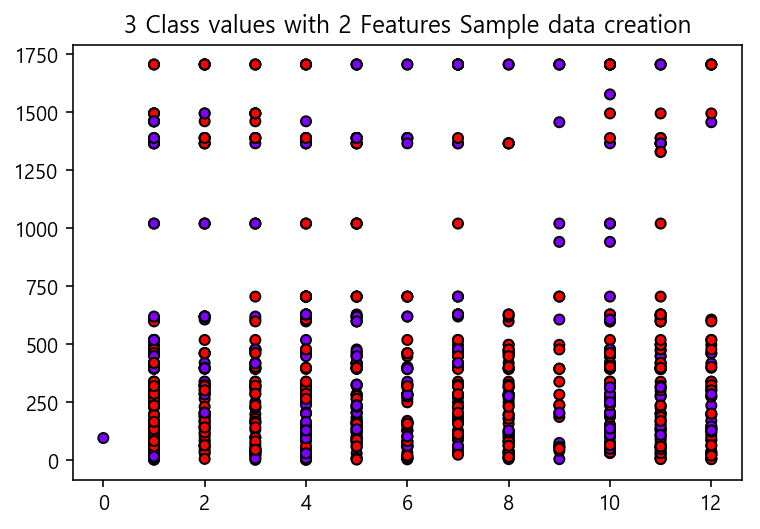

In [78]:
plt.title("3 Class values with 2 Features Sample data creation")

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_train['회원가입월'], X_train['주문횟수'], marker='o', c=y_label, s=25, cmap='rainbow', edgecolor='k')
plt.show()

**Non Parameter**

C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


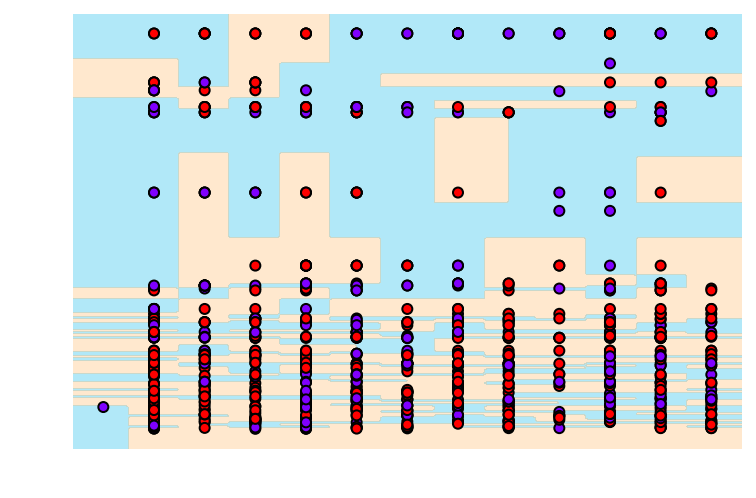

In [79]:
model = DecisionTreeClassifier()
model_df = model.fit(x_label,y_label)
visualize_boundary(model_df, x_label, y_label)

**Grid Search CV Parameter**

C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


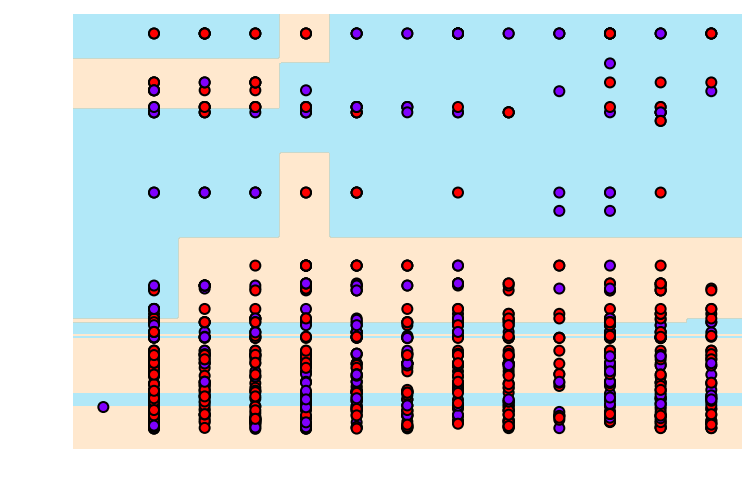

In [80]:
model = DecisionTreeClassifier(max_depth=5,min_samples_split=3)
model_df = model.fit(x_label,y_label)
visualize_boundary(model_df, x_label, y_label)

# 모델 평가

In [81]:
def classification_evaluation(Y_test,Y_pred_test):
    confusion = confusion_matrix(Y_test,Y_pred_test)
    accuracy = accuracy_score(Y_test,Y_pred_test)
    precision = precision_score(Y_test,Y_pred_test)
    recall = recall_score(Y_test,Y_pred_test)
    f1 = f1_score(Y_test,Y_pred_test)
    roc_score = roc_auc_score(Y_test, Y_pred_test)

    print("Confusion Matrix")
    print(confusion)
    print(" ")
    print("정확도 : ",accuracy.round(3))
    print("정밀도 : ",precision.round(3))
    print("재현률 : ",recall.round(3))
    print("F1 Score : ",f1.round(3))
    print('ROC AUC 값: ', roc_score.round(3))
    print(" ")

def classification_evaluation_Threshold(Y_test,Y_pred_test,thresholds):
    for customer_threshold in thresholds:
        customer_Binarizer = Binarizer(threshold = customer_threshold).fit(Y_pred_test)
        customer_Predict = customer_Binarizer.transform(Y_pred_test)
        print("======= Threshold : ", customer_threshold,"=======")
        classification_evaluation(Y_test,customer_Predict)

In [82]:
def precision_recall_curve_plot(Y_test, prdict_proba_class1):
    precisions, recalls, thresholds = precision_recall_curve(Y_test, prdict_proba_class1)
    
    plt.figure(figsize=[10,10])
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--',label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # 그래프 X축 Scaling (Scale 단위 0.1)
    start ,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    # 그래프 설정 
    plt.xlabel('Threshold value')
    plt.title('Precision & Recall value')
    plt.legend()
    plt.show()

In [83]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    plt.figure(figsize=[10,5])
    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

In [84]:
model = GradientBoostingClassifier(max_depth=5,min_samples_split=4)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_train)
Y_pred_test = model.predict(X_test)

accuracy_score(Y_test,Y_pred_test).round(3)

C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.694

Text(0.5, 16.0, 'Predicted label')

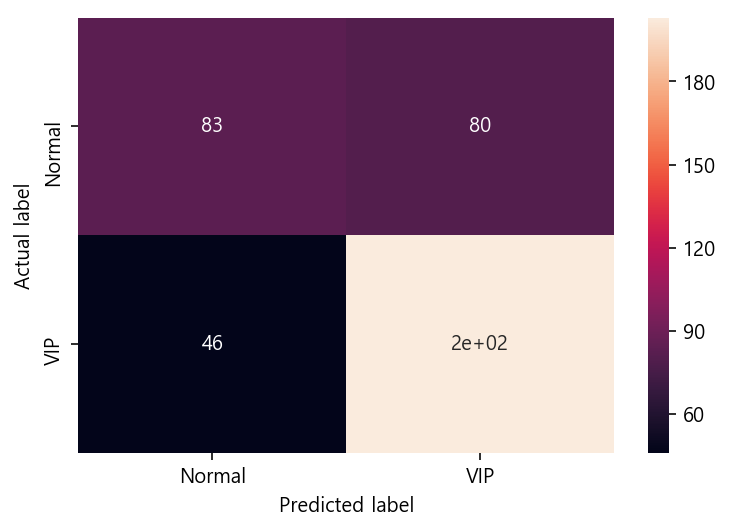

In [85]:
cm = pd.DataFrame(confusion_matrix(Y_test, Y_pred_test), columns=['Normal','VIP'], index=['Normal','VIP'])
sns.heatmap(cm, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [86]:
result = np.concatenate([model.predict_proba(X_test), model.predict(X_test).reshape(-1,1)],axis=1)
pd.DataFrame(result, columns=['normal확률','VIP확률','예측(VIP)']).head(30)

,normal확률,VIP확률,예측(VIP)
0,0.657901,0.342099,0.0
1,0.438641,0.561359,1.0
2,0.392982,0.607018,1.0
3,0.737067,0.262933,0.0
4,0.291276,0.708724,1.0
5,0.699751,0.300249,0.0
6,0.189717,0.810283,1.0
7,0.321216,0.678784,1.0
8,0.103791,0.896209,1.0
9,0.184972,0.815028,1.0


In [87]:
# 임계값 
thresholds1 = [0.01 , 0.05 , 0.15 , 0.25 , 0.35 , 0.45 ]  
thresholds2 = [0.01 , 0.013 , 0.015 , 0.017 , 0.019 , 0.02 ]  
thresholds3 = [0.25, 0.27,0.29,0.31,0.33,0.35]
thresholds4 = [0.30, 0.31, 0.32, 0.33, 0.34, 0.35]

# Test Set으로 Model을 적용했을 때, VIP일 확률 값 
prdict_proba_class1 = model.predict_proba(X_test)[:,1].reshape(-1,1)


classification_evaluation_Threshold(Y_test,prdict_proba_class1,thresholds1)

======= Threshold :  0.01 =======
Confusion Matrix
[[  0 163]
 [  0 249]]
 
정확도 :  0.604
정밀도 :  0.604
재현률 :  1.0
F1 Score :  0.753
ROC AUC 값:  0.5
 
======= Threshold :  0.05 =======
Confusion Matrix
[[  1 162]
 [  0 249]]
 
정확도 :  0.607
정밀도 :  0.606
재현률 :  1.0
F1 Score :  0.755
ROC AUC 값:  0.503
 
======= Threshold :  0.15 =======
Confusion Matrix
[[  7 156]
 [  6 243]]
 
정확도 :  0.607
정밀도 :  0.609
재현률 :  0.976
F1 Score :  0.75
ROC AUC 값:  0.509
 
======= Threshold :  0.25 =======
Confusion Matrix
[[ 24 139]
 [ 12 237]]
 
정확도 :  0.633
정밀도 :  0.63
재현률 :  0.952
F1 Score :  0.758
ROC AUC 값:  0.55
 
======= Threshold :  0.35 =======
Confusion Matrix
[[ 51 112]
 [ 25 224]]
 
정확도 :  0.667
정밀도 :  0.667
재현률 :  0.9
F1 Score :  0.766
ROC AUC 값:  0.606
 
======= Threshold :  0.45 =======
Confusion Matrix
[[ 68  95]
 [ 38 211]]
 
정확도 :  0.677
정밀도 :  0.69
재현률 :  0.847
F1 Score :  0.76
ROC AUC 값:  0.632
 


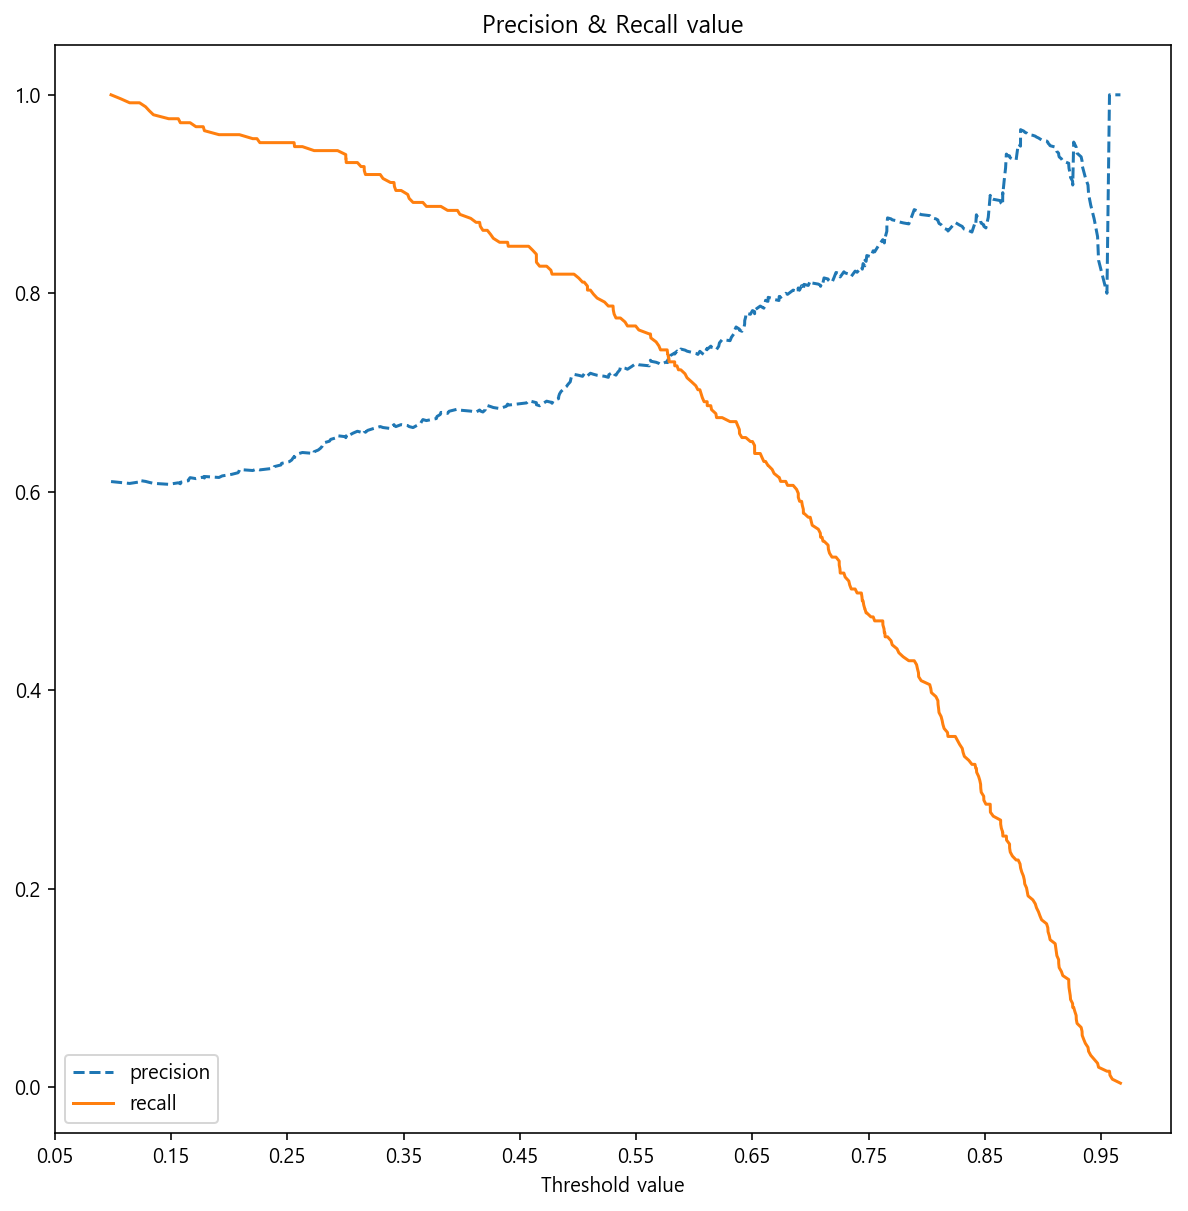

In [88]:
precision_recall_curve_plot(Y_test,prdict_proba_class1)

In [89]:
thresholds = [ 0.21, 0.23, 0.25,0.27,0.29,0.31]

# Test Set으로 Model을 적용했을 때, VIP일 확률 값 
prdict_proba_class1 = model.predict_proba(X_test)[:,1].reshape(-1,1)


classification_evaluation_Threshold(Y_test,prdict_proba_class1,thresholds)

======= Threshold :  0.21 =======
Confusion Matrix
[[ 18 145]
 [ 11 238]]
 
정확도 :  0.621
정밀도 :  0.621
재현률 :  0.956
F1 Score :  0.753
ROC AUC 값:  0.533
 
======= Threshold :  0.23 =======
Confusion Matrix
[[ 20 143]
 [ 12 237]]
 
정확도 :  0.624
정밀도 :  0.624
재현률 :  0.952
F1 Score :  0.754
ROC AUC 값:  0.537
 
======= Threshold :  0.25 =======
Confusion Matrix
[[ 24 139]
 [ 12 237]]
 
정확도 :  0.633
정밀도 :  0.63
재현률 :  0.952
F1 Score :  0.758
ROC AUC 값:  0.55
 
======= Threshold :  0.27 =======
Confusion Matrix
[[ 30 133]
 [ 14 235]]
 
정확도 :  0.643
정밀도 :  0.639
재현률 :  0.944
F1 Score :  0.762
ROC AUC 값:  0.564
 
======= Threshold :  0.29 =======
Confusion Matrix
[[ 39 124]
 [ 14 235]]
 
정확도 :  0.665
정밀도 :  0.655
재현률 :  0.944
F1 Score :  0.773
ROC AUC 값:  0.592
 
======= Threshold :  0.31 =======
Confusion Matrix
[[ 44 119]
 [ 17 232]]
 
정확도 :  0.67
정밀도 :  0.661
재현률 :  0.932
F1 Score :  0.773
ROC AUC 값:  0.601
 


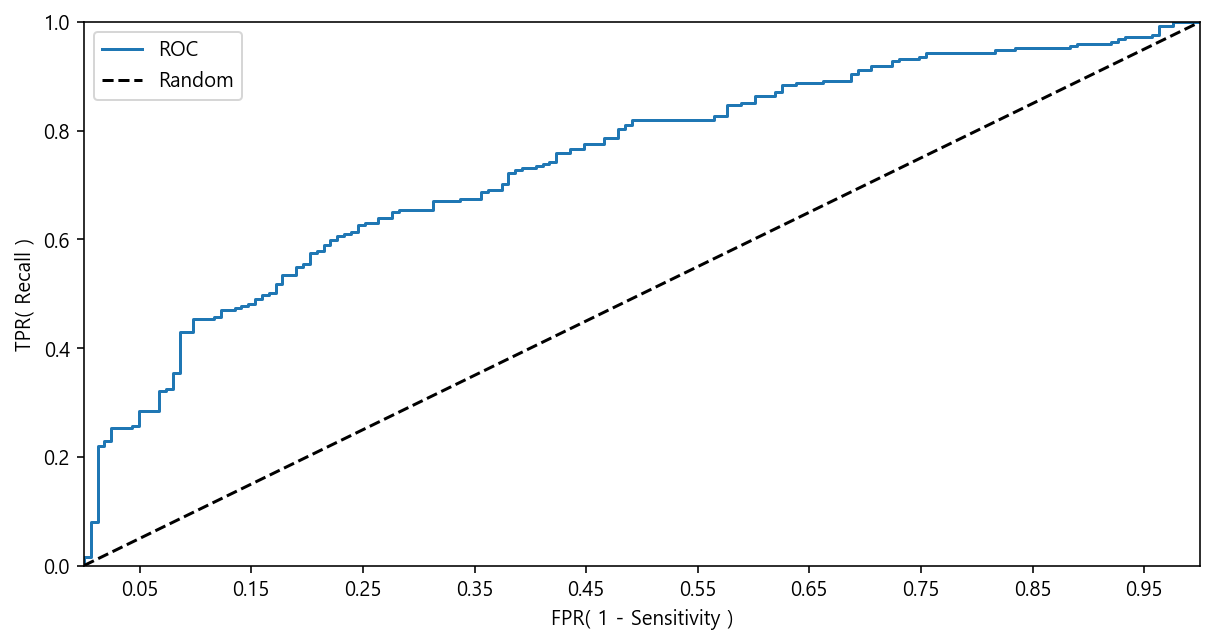

In [90]:
roc_curve_plot(Y_test, prdict_proba_class1)

# Reprediction

In [91]:
customer_threshold = 0.31
Binarizer(threshold = customer_threshold)

prdict_proba = model.predict_proba(X_test)

# reshape 함수: 한행으로 이어진 array --> 열로 
prdict_proba_col = prdict_proba[:,1].reshape(-1,1)

# 새로운 임계값 입력하기
customer_Binarizer = Binarizer(threshold = customer_threshold).fit(prdict_proba_col)
customer_Predict = customer_Binarizer.transform(prdict_proba_col)

# 새로운 임계값으로 계산된 새로운 예측값 구하기
customer_Predict

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [92]:
# 결과 확인 
confusion_matrix(Y_test,customer_Predict)

array([[ 44, 119],
       [ 17, 232]], dtype=int64)

Text(0.5, 15.578125, 'Predicted label')

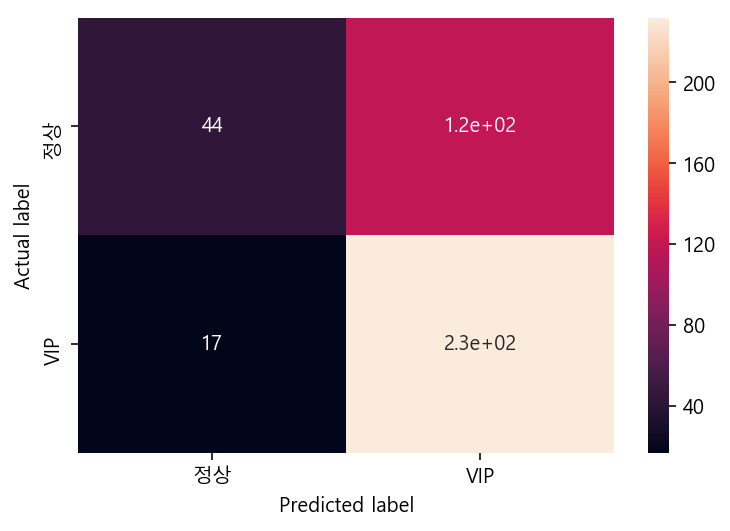

In [93]:
cm = pd.DataFrame(confusion_matrix(Y_test, customer_Predict), columns=['정상','VIP'], index=['정상','VIP'])
sns.heatmap(cm, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [94]:
classification_evaluation(Y_test,customer_Predict)

Confusion Matrix
[[ 44 119]
 [ 17 232]]
 
정확도 :  0.67
정밀도 :  0.661
재현률 :  0.932
F1 Score :  0.773
ROC AUC 값:  0.601
 


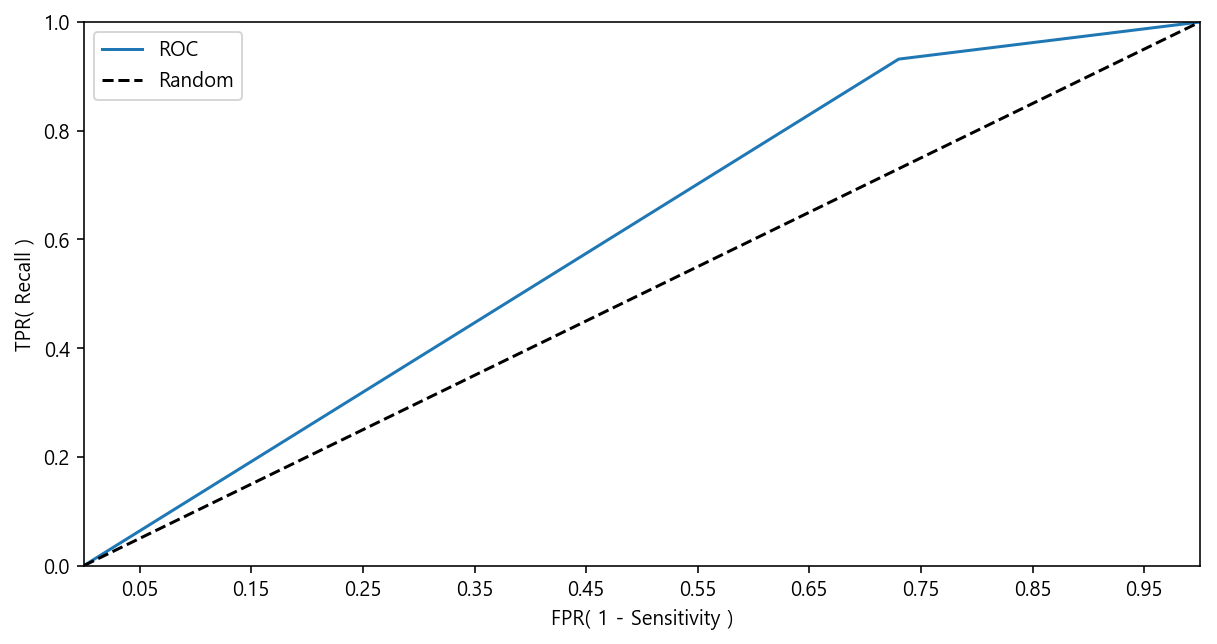

In [95]:
roc_curve_plot(Y_test, customer_Predict)

**FEATURE 중요 순서도**

In [96]:
print("Feature Importance")
importance_list = [] 
value_list = []
for name,value in zip(X.columns,model.feature_importances_):
    if value >=0.05:
        print(name ," : ", value.round(3))
        importance_list.append(name)
        value_list.append(value)
    else:
        pass

Feature Importance
주문횟수  :  0.127
19년이후 누적주문횟수  :  0.201
누적주문횟수  :  0.109


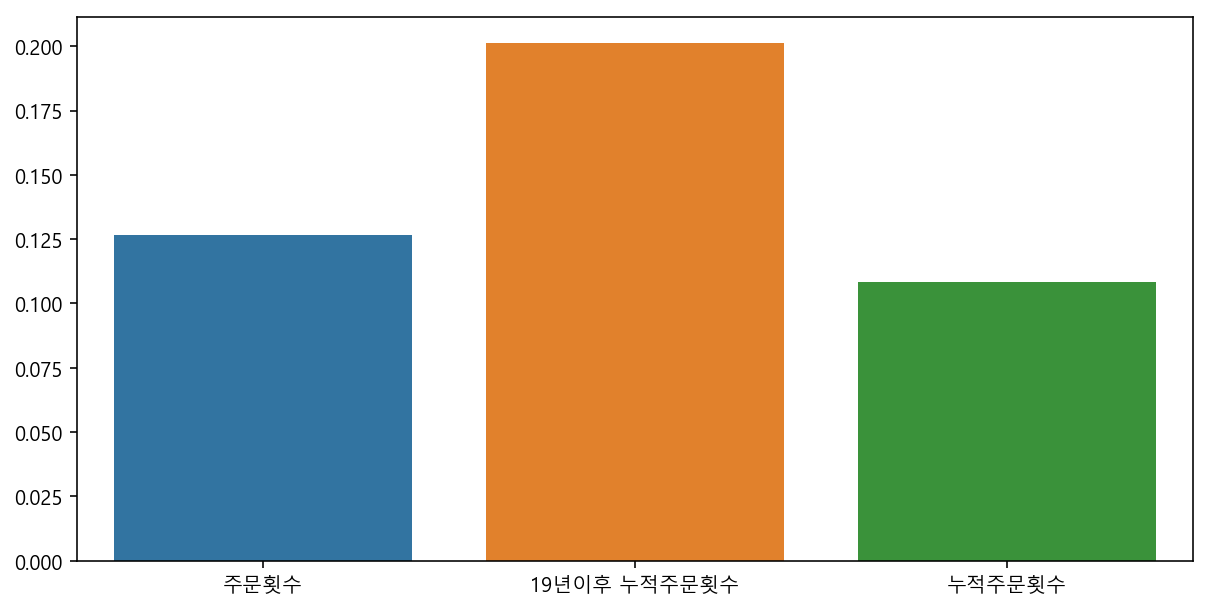

In [97]:
plt.figure(figsize=[10,5])
sns.barplot(y=value_list, x=importance_list)

In [98]:
print("VIP 고객 분류모델 끄읏!")

VIP 고객 분류모델 끄읏!
